In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

- **experimentCod**e : which experiment version was run (only 1 unique value)
- **completion_code** : the unique code the participant needed to provide to get credit


- **uniqueID** : the unique ID of this participant
- **_demographics_**:
- **country** : participant's country (self-report)
- **gender** : participant's gender (self-report)
- **age** : participant's age (self-report)


- **state** : current state of the experiment. Always "finished-instructions".
- **trialNumber** : how many faces have previously been rated by this participant. Ranges from 0 to 4.


- **faceID** : the ID of the current face being rated.
- **_responses_**:
- **description** : the written description of the face generated by the participant
- **typical** : the perceived "typicality", generated by the participant, of the face in the image. _Unique values: "very", "somewhat", "little", "none"_
- **attractive** : the perceived "attractiveness", generated by the participant, of the face in the image. _Unique values: "very", "somewhat", "little", "none"_
- **photo-gender** : the perceived gender, generated by the participant, of the face in the image
- **race** : the perceived race, generated by the participant, of the face in the image
- **age** : the perceived age, generated by the participant, of the face in the image

In [2]:
fr1 = pd.read_csv('csv/face_rating_1_expanded.csv')
fr1 = fr1.drop(columns=['demographics', 'responses'])

In [3]:
fr1.head(2)

,Unnamed: 0,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_age,face_perceived_description,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_race,face_perceived_age
0,0,2DMEk-#-hrpVP,guess-who-demo,IMG_8889,finished-instructions,4,98446,India,female,45,A female with a regular face[comma] longish ha...,somewhat,little,female,Mexican,24
1,1,zLuw8-#-izP36,guess-who-demo,IMG_0386,finished-instructions,0,40277,United States of America,male,40,average guy,somewhat,little,male,white,35


In [10]:
fr1.shape

(1143, 15)

### experimentcode

There are 2 values, what is the difference?

In [11]:
fr1.experimentCode.value_counts()

guess-who-demo        1018
guess-who-version2     125
Name: experimentCode, dtype: int64

In [4]:
fr1.iloc[[fr1[fr1.experimentCode =='guess-who-demo'].iloc[0].name, fr1[fr1.experimentCode =='guess-who-version2'].iloc[0].name]]

,Unnamed: 0,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_age,face_perceived_description,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_race,face_perceived_age
0,0,2DMEk-#-hrpVP,guess-who-demo,IMG_8889,finished-instructions,4,98446,India,female,45,A female with a regular face[comma] longish ha...,somewhat,little,female,Mexican,24
1018,1018,GrKMP-#-fkpWk,guess-who-version2,IMG_8168,finished-instructions,4,69992,Ukraine,male,30,Straightforward. Sportsman. Reliable. Woman's ...,little,very,male,white,26


In [5]:
ex_demo = fr1[fr1.experimentCode =='guess-who-demo']
ex_v2 = fr1[fr1.experimentCode =='guess-who-version2']

#check for overlapping participant ID in both face rating datasets
ex_demo_par = ex_demo.uniqueID.unique()
ex_v2_par = ex_v2.uniqueID.unique()

print('unique participant ID in demo experiment:', len(ex_demo_par))
print('unique participant ID in guesswho version2:', len(ex_v2_par))
print('unique participant ID in both datasets:', len(set(ex_demo_par).intersection(ex_v2_par)))

print()

#check overlapping faceID's in both face rating datasets
ex_demo_uf = ex_demo.faceID.unique()
ex_v2_uf = ex_v2.faceID.unique()

print('unique faceID in demo experiment:', len(ex_demo_uf))
print('unique faceID in guesswho version2:', len(ex_v2_uf))
print('unique faceID in both datasets:', len(set(ex_demo_uf).intersection(ex_v2_uf)))

print()
#print('faceID only in face rating data 2:', set(fr2_uf)^set(fr1_uf))

unique participant ID in demo experiment: 208
unique participant ID in guesswho version2: 25
unique participant ID in both datasets: 0

unique faceID in demo experiment: 191
unique faceID in guesswho version2: 36
unique faceID in both datasets: 36



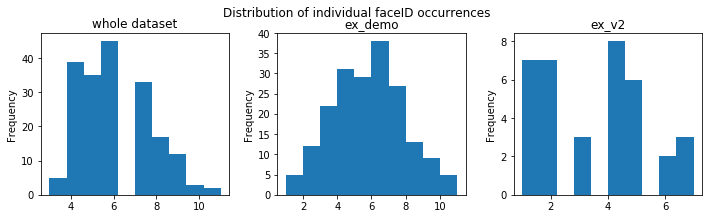

In [6]:
plt.figure(figsize=(10,3))
plt.suptitle('Distribution of individual faceID occurrences', y=1)

plt.subplot(131)
fr1.faceID.value_counts().plot(kind='hist')
plt.title('whole dataset')

plt.subplot(132)
ex_demo.faceID.value_counts().plot(kind='hist')
plt.title('ex_demo')

plt.subplot(133)
ex_v2.faceID.value_counts().plot(kind='hist')
plt.title('ex_v2')

plt.tight_layout()

### face_perceived_age

In [7]:
fr1.face_perceived_age.value_counts()

25                    130
24                    119
22                    115
23                     93
20                     81
26                     79
28                     73
30                     58
21                     56
27                     50
19                     41
18                     33
29                     29
35                     26
32                     21
31                     18
38                     13
40                     11
33                     11
34                     10
36                      8
45                      8
16                      6
37                      6
39                      4
42                      4
17                      4
48                      3
15                      3
60                      3
55                      2
47                      2
46                      2
41                      2
58                      2
62                      1
72                      1
male                    1
67          

#### there are some wrong values: (male, white, very silent person, 2-). Also 2 seems not correct

lets check out those rows

In [8]:
wrong_perc_age = [fr1[fr1.face_perceived_age == 'male'].iloc[0].name,
                  fr1[fr1.face_perceived_age == 'white'].iloc[0].name,
                  fr1[fr1.face_perceived_age == 'very silent person'].iloc[0].name,
                  fr1[fr1.face_perceived_age == '2-'].iloc[0].name,
                  fr1[fr1.face_perceived_age == '2'].iloc[0].name
                 ]

fr1.iloc[wrong_perc_age]

,Unnamed: 0,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_age,face_perceived_description,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_race,face_perceived_age
425,425,QveMw-#-XNcj7,guess-who-demo,IMG_7942,finished-instructions,4,59515,United States of America,male,29,i think this person is very intelligent,very,very,male,arab,male
305,305,lsprM-#-qZEOf,guess-who-demo,IMG_8592,finished-instructions,4,71660,United States of America,female,22,She has short brown hair and is white. She loo...,little,little,female,37,white
494,494,IFjbB-#-YabeV,guess-who-demo,IMG_0093,finished-instructions,0,62127,United States of America,female,25,very handsome person,little,very,male,5 point,very silent person
640,640,x98Fg-#-Zdst1,guess-who-demo,IMG_7517,finished-instructions,1,37766,United States of America,male,23,This girl probably grew up in a typical 2 pare...,somewhat,somewhat,female,White,2-
1113,1113,Il21Y-#-18fyM,guess-who-version2,IMG_9695,finished-instructions,4,88544,United States of America,female,24,long hair dont care,none,none,male,white,2



- For first wrong value row the other values seem ok, so change perceived age to np.nan
- For the second wrong value row the values probably got switched around with perceived race, we can fix that
- The third error should also be changed to np.nan, and perceived race is also wrong, change that as well to np.nan
- The fourth error is probably a typo and meant to be 20, but not sure so change to np.nan
- Fifth error also change to np.nan

In [9]:
#For first wrong value row the other values seem ok, so change perceived age to np.nan
fr1.face_perceived_age.iloc[425] = np.nan

#For the second wrong value row the values probably got switched around with perceived race, we can fix that
age = fr1.iloc[305].face_perceived_race
race = fr1.iloc[305].face_perceived_age

fr1.face_perceived_age.iloc[305] = age
fr1.face_perceived_race.iloc[305] = race

#The third error should also be changed to np.nan, and perceived race is also wrong, change that as well to np.nan
fr1.face_perceived_age.iloc[494] = np.nan
fr1.face_perceived_race.iloc[494] = np.nan

#The fourth error is probably a typo and meant to be 20, but not sure so change to np.nan
fr1.face_perceived_age.iloc[640] = np.nan

#Fifth error also change to np.nan
fr1.face_perceived_age.iloc[1113] = np.nan

C:\Users\Paradigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
def plot_distr(feature, kind='hist', size=(10,3)):
    ex_demo = fr1[fr1.experimentCode =='guess-who-demo']
    ex_v2 = fr1[fr1.experimentCode =='guess-who-version2']
    
    plt.figure(figsize=size)
    plt.suptitle(feature +' Histogram', y=1)

    plt.subplot(131)
    fr1[feature].value_counts().plot(kind=kind)
    plt.title('whole dataset')

    plt.subplot(132)
    ex_demo[feature].value_counts().plot(kind=kind)
    plt.title('ex_demo')

    plt.subplot(133)
    ex_v2[feature].value_counts().plot(kind=kind)
    plt.title('ex_v2')

    plt.tight_layout()

In [11]:
fr1.face_perceived_age = fr1.face_perceived_age.astype(float)

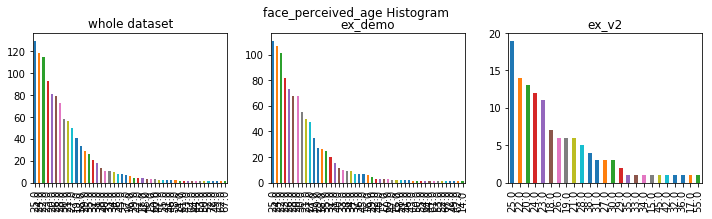

In [12]:
plot_distr('face_perceived_age', kind='bar')


### face_perceived_photo-gender


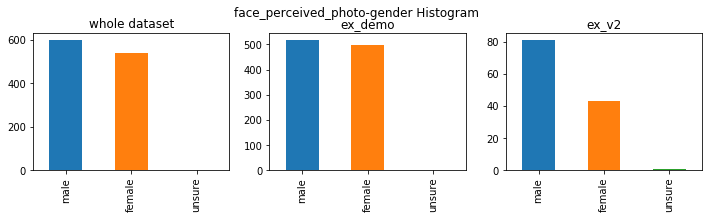

In [168]:
plot_distr('face_perceived_photo-gender', kind='bar')


In [176]:
#check out unsure
fr1[fr1['face_perceived_photo-gender'] == 'unsure']

,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_age,face_perceived_description,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_race,face_perceived_age
225,a8rnq-#-vDYKl,guess-who-demo,IMG_9334,finished-instructions,3,532,United States of America,male,21,A normal person who may or may not be transgender,little,little,unsure,Hispanic,25.0
244,bPjaG-#-VUliI,guess-who-demo,IMG_9228,finished-instructions,3,61424,United States of America,male,35,I think this person may be transgender but I a...,little,none,unsure,white,21.0
1105,sNWJr-#-A3TfA,guess-who-version2,IMG_8697,finished-instructions,2,26793,United States of America,female,29,I think she is female but she is a little ambi...,little,none,unsure,asian,28.0


### face_perceived_race

In [13]:
fr1.face_perceived_race.unique()

array(['Mexican', 'white', 'Biracial', 'White', 'Asian', 'caucasian',
       'Caucasian', '6', 'Hispanic', 'Indian', 'WHITE', 'asian',
       'white caucasian', 'indian', 'white Caucasian ', 'asain',
       'american', 'Muslim ', 'white/caucasian', 'black', 'hispanic',
       'Middle Eastern', 'white ', 'Male', 'iranian', 'middle eastern',
       'hispanic ', 'filipino/white', 'American', 'latino', 'Arabic',
       'Italian', 'Asia', 'asian and white', 'Indian/South Asian',
       'North African', 'East European', 'Asian ', 'MEXICAN ',
       'Pakistani', 'Indian ', 'Cacuasian', 'Latino',
       'maybe native american (central american specifically)', 'russian',
       'white/asian', 'Caucasian ', 'Aisian', 'Polish',
       'south east asian', 'south asian', 'pacific islander', 'Persian',
       'east asian', 'caucaian', 'mexican?', 'Hispanic or mixed',
       'European', 'Asian american', 'Mixed Asian/Hispanic', 'German',
       'Caucasain', '5', 'Caucasian  ', 'arab', 'hawaiin', 'Fil

A lot of values, and some obvious errors. First lets check out the erros

In [15]:
def check_wrong(df, feat, values):
    wrong_list = []
    for val in values:
        wrong_list.append(df[df[feat] == val].iloc[0].name)
    return df.iloc[wrong_list]

In [17]:
check_wrong(fr1, 'face_perceived_race', ['6', '5', 'X'])

,Unnamed: 0,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_age,face_perceived_description,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_race,face_perceived_age
18,18,UVSJn-#-WYYgT,guess-who-demo,IMG_7897,finished-instructions,2,93403,India,female,25,very sexy,somewhat,very,male,6,35.0
414,414,UVSJn-#-WYYgT,guess-who-demo,IMG_8592,finished-instructions,3,93403,India,female,25,very sweet,somewhat,very,female,5,40.0
546,546,es7YK-#-tc6Ol,guess-who-demo,IMG_9409,finished-instructions,4,36107,United States of America,neither,30,Dark haired girl,somewhat,somewhat,female,X,27.0


In [18]:
#change wrong values to np.nan
fr1.face_perceived_race.iloc[18] = np.nan
fr1.face_perceived_race.iloc[414] = np.nan
fr1.face_perceived_race.iloc[546] = np.nan

C:\Users\Paradigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### participant_age

In [20]:
fr1.participant_age.unique()

array([45, 40, 30, 42, 32, 24, 23, 29, 33, 25, 31, 26, 44, 37, 58, 47, 27,
       51, 28, 43, 38, 34, 52, 62, 36, 53, 22, 21, 55, 75, 18, 35, 49, 39,
       41, 54, 50, 68, 56, 63, 60, 46, 59, 70, 65], dtype=int64)

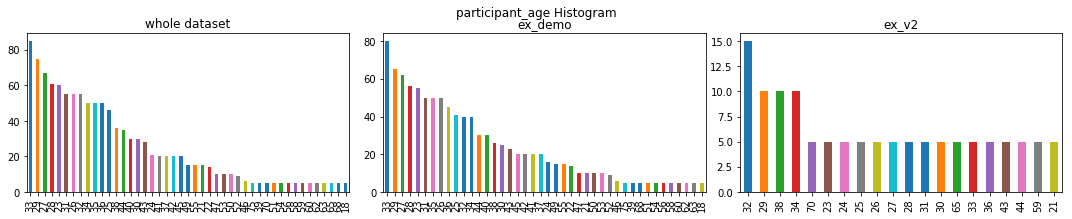

In [205]:
plot_distr('participant_age', kind='bar', size=(15,3))

nothing strange here

### participant_country

In [21]:
fr1.participant_country.unique()

array(['India', 'United States of America', 'Canada', 'Portugal',
       'Lithuania', 'Chile', 'Indonesia', 'Ukraine'], dtype=object)

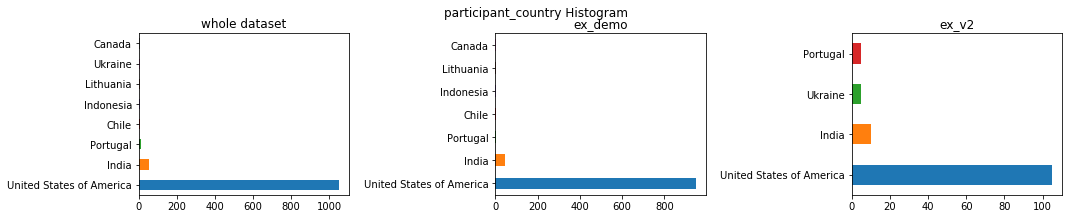

In [22]:
plot_distr('participant_country', kind='barh', size=(15,3))

### participant_gender

In [209]:
fr1.participant_gender.unique()

array(['female', 'male', 'neither'], dtype=object)

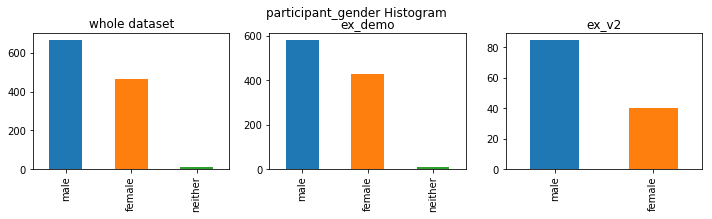

In [211]:
plot_distr('participant_gender', kind='bar', size=(10,3))

# Face Rating 2

In [23]:
fr2 = pd.read_csv('csv/face_rating_2_expanded.csv')
fr2 = fr2.drop(columns=['demographics', 'responses'])

In [363]:
fr2.shape

(2491, 22)

In [214]:
fr2.head(2)

,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_ethnicity-details,participant_ethnicity,...,face_perceived_physical-description,face_perceived_occupation,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_ethnicity-details,face_perceived_ethnicity,face_perceived_eye,face_perceived_hair,face_perceived_age
0,FMii2-#-vNw4F,guess-who-rating-task-v2,IMG_8622,finished-instructions,2,85762,United States of America,female,NaN,white,...,Has beautiful eyebrows and a nice hair cut. Hi...,Student or starbucks barista,neutral,agree,male,indian,african,brown,black,20
1,oA0SP-#-L8ggp,guess-who-rating-task-v2,IMG_7942,finished-instructions,3,91607,United States of America,male,NaN,white,...,They have short[comma] dark hair and light bro...,grad student,agree,agree,male,Lebanese,white,brown,black,24
2,kgWRx-#-dYt3U,guess-who-rating-task-v2,IMG_0401,finished-instructions,3,60735,United States of America,male,NaN,white,...,This is an Asian guy in his 20s. He has short ...,Student,agree,disagree,male,NaN,african,black,black,25


In [24]:
print(fr2.uniqueID.nunique())
print(fr2.completion_code.nunique())

515
516


515 unique IDs, but 516 completion codes?

In [25]:
fr2.uniqueID.value_counts()[:2]

517      10
81914     5
Name: uniqueID, dtype: int64

In [26]:
fr2[fr2.uniqueID == 517].completion_code.unique()

array(['Ey2DC-#-Rsj84', 'fPPTo-#-9lLbu'], dtype=object)

So unique ID 517 has 2 completion codes

In [27]:
def fr2_plot_distr(feature, kind='hist', size=(10,3)):
    fr2_ex_demo = fr2[fr2.experimentCode =='guess-who-demo']
    fr2_ex_v2 = fr2[fr2.experimentCode =='guess-who-rating-task-v2']
    
    plt.figure(figsize=size)
    plt.suptitle(feature +' Histogram', y=1)

    plt.subplot(131)
    fr2[feature].value_counts().plot(kind=kind)
    plt.title('whole dataset')

    plt.subplot(132)
    fr2_ex_demo[feature].value_counts().plot(kind=kind)
    plt.title('ex_demo')

    plt.subplot(133)
    fr2_ex_v2[feature].value_counts().plot(kind=kind)
    plt.title('ex_v2')

    plt.tight_layout()

### experimentCode

In [28]:
fr2.experimentCode.value_counts()

guess-who-rating-task-v2    2363
guess-who-demo               128
Name: experimentCode, dtype: int64

In [29]:
fr2_ex_demo = fr2[fr2.experimentCode =='guess-who-demo']
fr2_ex_v2 = fr2[fr2.experimentCode =='guess-who-rating-task-v2']

In [30]:
#check for overlapping participant ID in both face rating datasets
ex_demo_par = fr2_ex_demo.uniqueID.unique()
ex_v2_par = fr2_ex_v2.uniqueID.unique()

print('unique participant ID in demo experiment:', len(ex_demo_par))
print('unique participant ID in guesswho version2:', len(ex_v2_par))
print('unique participant ID in both datasets:', len(set(ex_demo_par).intersection(ex_v2_par)))

print()

#check overlapping faceID's in both face rating datasets
ex_demo_uf = fr2_ex_demo.faceID.unique()
ex_v2_uf = fr2_ex_v2.faceID.unique()

print('unique faceID in demo experiment:', len(ex_demo_uf))
print('unique faceID in guesswho version2:', len(ex_v2_uf))
print('unique faceID in both datasets:', len(set(ex_demo_uf).intersection(ex_v2_uf)))


unique participant ID in demo experiment: 28
unique participant ID in guesswho version2: 487
unique participant ID in both datasets: 0

unique faceID in demo experiment: 94
unique faceID in guesswho version2: 193
unique faceID in both datasets: 94


In [31]:
fr2.uniqueID.nunique()

515

### participant_age

In [233]:
fr2.participant_age.unique()

array([36, 35, 21, 23, 26, 38, 33, 37, 29, 25, 34, 27, 30, 39, 32, 48, 54,
       50, 55, 28, 57, 45, 22, 41, 24, 42, 46, 44, 49, 31, 47, 51, 53, 40,
       52, 43, 63, 18, 69, 56, 60, 19, 20, 62], dtype=int64)

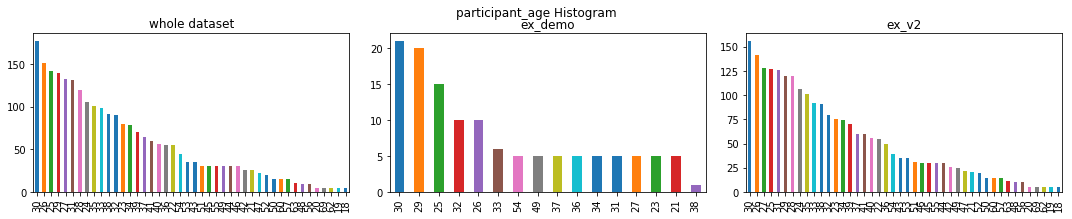

In [238]:
fr2_plot_distr('participant_age', kind='bar', size=(15,3))

### participant_country

In [243]:
print(fr2.participant_country.unique())

['United States of America' 'India' 'Lithuania' 'Trinidad and Tobago'
 'Ireland' 'Canada' 'Dominican Republic' 'Chile' 'Portugal' 'Spain']


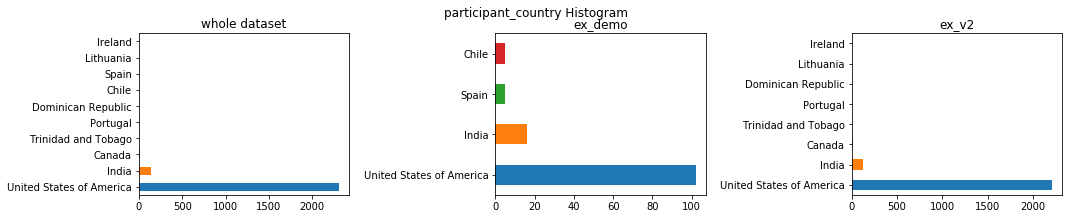

In [241]:
fr2_plot_distr('participant_country', kind='barh', size=(15,3))

In [252]:
print('fr2_ex_v2')
print(fr2_ex_v2.participant_country.value_counts())
print()
print('fr2_ex_demo')
print(fr2_ex_demo.participant_country.value_counts())

fr2_ex_v2
United States of America    2210
India                        122
Canada                        10
Trinidad and Tobago            5
Portugal                       5
Dominican Republic             5
Lithuania                      5
Ireland                        1
Name: participant_country, dtype: int64

fr2_ex_demo
United States of America    102
India                        16
Spain                         5
Chile                         5
Name: participant_country, dtype: int64


### participant_ethnicity

In [254]:
print(fr2.participant_ethnicity.unique())

['white' 'african' 'latino']


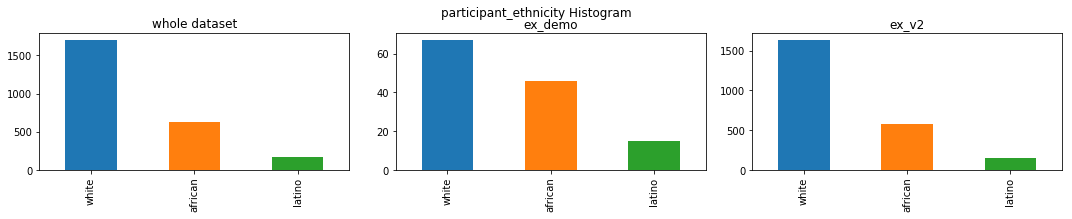

In [255]:
fr2_plot_distr('participant_ethnicity', kind='bar', size=(15,3))

In [261]:
#participant_ethnicity-details 
print(fr2['participant_ethnicity-details'].unique()) 

[nan 'American' 'also native american' 'white' 'Black ' 'White' 'american'
 'asian' 'hispanic' 'Caucasian/American of Irish-Polish descent '
 'Caucasian' 'Chinese' 'Black American' 'Korean' 'Jewish' 'Armenian'
 'Vietnamese' 'indian' 'Japanese' 'Irish, German, Scottish '
 'African American' 'non-hispanic' 'Indian' 'Puerto Rican' 'South Asian'
 'mexican' 'European American and East Slavic' 'Western European' 'Irish'
 'Asian American' 'Hispanic' 'puerto rican' 'Black' 'European'
 'White & Native American' 'Arab American' 'hindhu' 'usa'
 'Caucasoid (Germanic)' 'European American' 'vietnamese' 'Polish'
 'Georgian and Russian descent' 'caucasian' 'Filipino' 'Black/Greek'
 'latino' 'hindu' 'Jamaican and Irish' 'Asian']


### participant_gender

In [262]:
fr2.participant_gender.unique()

array(['female', 'male', 'neither'], dtype=object)

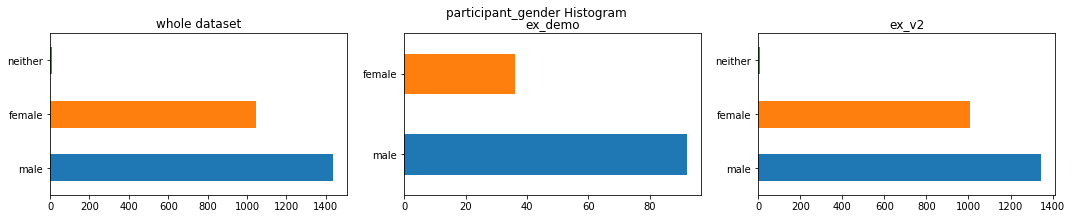

In [264]:
fr2_plot_distr('participant_gender', kind='barh', size=(15,3))

### face_perceived_age

In [32]:
fr2.face_perceived_age.unique()

array(['20', '24', '25', '23', '26', '45', '32', '16', '43', '27', '35',
       '19', '28', '38', '22', '21', '30', '18', '33', '42', '37', '40',
       '34', '50', '17', '29', '31', 'brown', '49', '36', '61', '55',
       '70', '60', '52', '15', '47', '44', '46', '54', '56', '48', '41',
       '18 ', '14', '2', '63', '51', '23dark', '39', '67', '57', '65',
       '53'], dtype=object)

In [33]:
check_wrong(fr2, 'face_perceived_age', ['brown', '23dark', '2'] )

,Unnamed: 0,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_ethnicity-details,...,face_perceived_physical-description,face_perceived_occupation,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_ethnicity-details,face_perceived_ethnicity,face_perceived_eye,face_perceived_hair,face_perceived_age
204,204,YW0va-#-UA54E,guess-who-rating-task-v2,IMG_9484,finished-instructions,2,24746,United States of America,male,NaN,...,White female of about 41 years old. Short brow...,food worker,neutral,disagree,female,NaN,white,green,41,brown
1573,1573,ykhNa-#-8r5Rd,guess-who-rating-task-v2,IMG_8243,finished-instructions,3,65447,United States of America,male,NaN,...,well well[comma] Latino girls are from the sou...,researchers,neutral,neutral,female,NaN,latino,dark,dark,23dark
1188,1188,J5IVm-#-2OxOk,guess-who-rating-task-v2,IMG_9831,finished-instructions,3,86610,United States of America,male,vietnamese,...,well defined[comma] well proportional person w...,"could be anything, either tech or nature related",neutral,agree,female,could be mixed,latino,green,dark blonde,2


- First error: perceived hair and perceived age switched, can be fixed
- Second error: should be 23, remove dark
- Third error: forgot to put last digit, check in description if age mentioned, otherwise change to np.nan

In [275]:
#third error: check in description if age mentioned,
print(fr2.iloc[1188]['face_perceived_non-physical-description'])
print(fr2.iloc[1188]['face_perceived_physical-description'])

I think this person is aware of environmental issues[comma] could be into healthy lifestyle  seems well educated[comma] seems to be smart and attractive. 
well defined[comma] well proportional person with attractive features of a female[comma] symmetrical and kind of sexy in a serious kind of way


In [344]:
#First error: perceived hair and perceived age switched, can be fixed
age = fr2.iloc[204].face_perceived_hair
hair = fr2.iloc[204].face_perceived_age

fr2.face_perceived_age.iloc[204] = age
fr2.face_perceived_hair.iloc[204] = hair

#Second error: should be 23, remove dark
fr2.face_perceived_age.iloc[1573] = '23'

#Third error: forgot to put last digit, check in description if age mentioned, otherwise change to np.nan
#no age mention so change to np.nan
fr2.face_perceived_age.iloc[1188] = np.nan

C:\Users\Paradigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


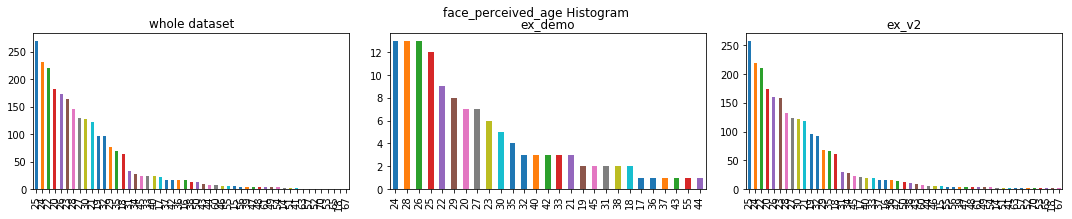

In [291]:
fr2_plot_distr('face_perceived_age', kind='bar', size=(15,3))

## face_perceived_attractive

In [294]:
fr2.face_perceived_attractive.value_counts()

agree                938
neutral              803
disagree             482
strongly-agree       152
strongly-disagree    116
Name: face_perceived_attractive, dtype: int64

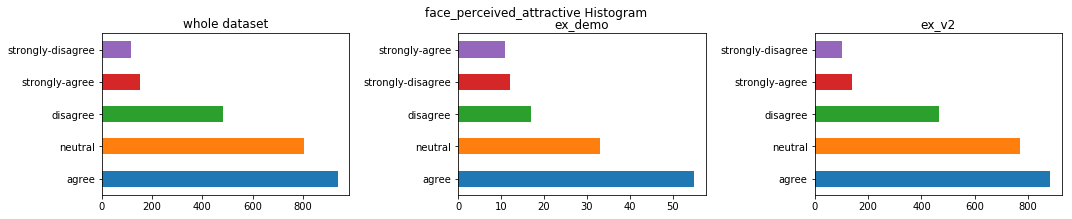

In [296]:
fr2_plot_distr('face_perceived_attractive', kind='barh', size=(15,3))

## face_perceived_ethnicity  (36 , 1.4% missing)

In [298]:
#no asian?
fr2.face_perceived_ethnicity.value_counts()

white      1592
african     616
latino      247
Name: face_perceived_ethnicity, dtype: int64

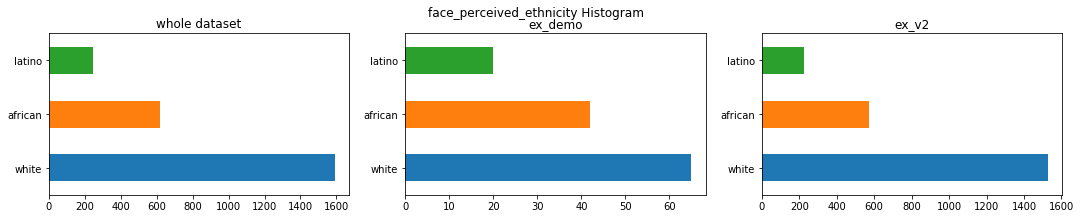

In [299]:
fr2_plot_distr('face_perceived_ethnicity', kind='barh', size=(15,3))

## face_perceived_ethnicity-details

In [301]:
fr2['face_perceived_ethnicity-details'].unique()

array(['indian', 'Lebanese', nan, 'Middle eastern', 'american',
       'maybe White/Latino', 'This person is about 1/2 German',
       'Caucasian', 'white', 'South Asian', 'arab', 'Caucasion', 'White',
       'American', 'Arab', 'eastern Europe, if I had to guess', 'China',
       'middle eastern', 'northern or eastern Europe',
       "I think they're middle-eastern", 'Jewish', 'Arabic',
       'Bangladesh/White mix', 'Indian', 'european american', 'Chinese',
       'white/ Canadian', 'Caucasian of eastern European descent.',
       'Kind of latino', 'Iranian', 'Japanese', 'French', 'buddhist ',
       'Chinese?', 'christian ', 'spanish european', 'Korean', 'Asian ',
       'Turk (roach)', 'maybe arab', 'Russian', 'South Asian ',
       'Looks from the middle East', 'Irish', 'Middle Eastern ',
       'This person has European/Scandinavian roots', 'Hispanic',
       'Spanish descent ', 'Indian or Pakistani', 'Western European',
       'German or Eastern European', 'from India', 'caucasi

### face_perceived_eye


In [302]:
fr2.face_perceived_eye.unique()

array(['brown', 'black', 'Blue', 'green', 'Black', 'brown ', 'blue',
       'Brown', 'Green', 'Hazel', 'Dark Brown', 'hazel', 'dark brown',
       'BLACK', 'hazel ', 'br', 'grey', 'geen', 'black/brown',
       'Dark Brown ', 'dark brown/black', 'blue ', 'good one', 'grey ',
       'good', 'Grey', 'dark brown eyes', 'blackq', 'Greenish brown',
       'BLUE', 'dark blue', 'brwn', 'balck', 'grey/brown', 'Brown ',
       'Dark brown', 'browo', 'browm', 'bronze', 'blac', 'light brown',
       ' blue', 'BROWN', 'eye', 'borwn', 'Gray', 'Very good.', 'Balck',
       'dark grey', 'Light Brown', 'dark brown ', 'blue or gray', 'Blue ',
       'Blonde', 'n;acl', 'purple', 'gray', 'blue eyes', 'dark',
       'Light Blue', 'Black, Dark Brown', 'browb', 'nrown', 'best',
       'Dark Brown, Black', 'block', 'Bue', 'broen',
       'Adelaide CompCogSci', 'Browqn', 'Dark green', 'bk', 'Dark brwon',
       'Green or hazel.', 'blue/green or gray', 'blue?'], dtype=object)

In [303]:
check_wrong(fr2,a 'face_perceived_eye', ['good', 'eye', 'Very good.', 'n;acl', 'best', 'Adelaide CompCogSci'] )

,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_ethnicity-details,participant_ethnicity,...,face_perceived_physical-description,face_perceived_occupation,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_ethnicity-details,face_perceived_ethnicity,face_perceived_eye,face_perceived_hair,face_perceived_age
319,m6tdZ-#-sZebs,guess-who-rating-task-v2,IMG_0214,finished-instructions,0,81914,India,male,NaN,african,...,Very good body maintain .Good height and color...,office boy,agree,neutral,male,NaN,white,good,good,26
758,RqeAK-#-CArEw,guess-who-rating-task-v2,IMG_9977,finished-instructions,3,77986,India,male,South Asian,african,...,Her hair looks black[comma] and combed as free...,Student,agree,agree,female,East Asian,african,eye,Black,21
986,xM7Re-#-HfA51,guess-who-rating-task-v2,IMG_8517,finished-instructions,0,87603,India,male,NaN,african,...,Good maintain body and good looking.Handsome p...,Software engineer,agree,agree,male,NaN,white,Very good.,good color,27
1385,hc1C7-#-ZLogq,guess-who-demo,IMG_8078,finished-instructions,3,55257,United States of America,male,NaN,white,...,The person looks quite innocent and handsome i...,Banker,strongly-agree,agree,male,NaN,latino,n;acl,brpwm,29
1782,m6tdZ-#-sZebs,guess-who-rating-task-v2,IMG_7866,finished-instructions,1,81914,India,male,NaN,african,...,Very energy women .Good maintain body .Good he...,housekeeper,agree,neutral,female,NaN,white,best,nice,25
1925,aYE0q-#-RAmCT,guess-who-rating-task-v2,IMG_7745,finished-instructions,2,67635,India,male,hindu,african,...,VERY HANDSOME AND BEAUTIFUL GUY. BUT CLOTHES I...,SOFTWARES,strongly-agree,agree,male,CHRISTIAN,latino,Adelaide CompCogSci,BLACK,30


Change all the wrong eye values to np.nan

In [345]:
#Change all the eye values to np.nan
eye_wrong = [319, 758, 986, 1385, 1782, 1925]
for i in eye_wrong:
    fr2.face_perceived_eye.iloc[i] = np.nan

C:\Users\Paradigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### face_perceived_hair

In [317]:
fr2.face_perceived_hair.unique()

array(['black', 'Blonde', 'brown', 'blonde', 'Black', 'Dirty blond',
       'Brown', 'red', 'light brown', 'Brown/blonde ', 'browb',
       'Medium Brown', 'blond', 'dark brown dyed blond', 'Dark brown',
       'dirty blonde', 'Brawn', 'dark brown', 'Dirty Blonde', 'BLACK',
       'Red', 'reddish brown ', 'br', 'white', 'Sandy Blonde', 'Blond',
       'BROWN', 'strawberry blonde', 'brown; dyed blonde',
       'light brown hair', 'Dark blonde', 'reddish brown', 'blue',
       'Brunette, Brown, Blonde', 'grey brown ', 'good selection',
       'dishwater blonde', 'sandy brown', 'auburn',
       'Brown with red highlights', 'black ', 'Dark Brown', 'Light brown',
       'good', 'dark blond', 'Light Brown', 'Dark blond',
       'brownish-blonde', 'Green and black', 'blakc', 'Dark Brown/Black',
       'Pale blonde', 'BLONDE', 'brunette', 'Brownish Blonde',
       'GREY AND BLACK', 'burgundy', 'Balck', 'orange', 'dark', 'Black ',
       'grey', 'light brwon', 'lack', 'Ash Blonde', 'Brunette',


In [322]:

check_wrong(fr2, 'face_perceived_hair', ['none'] )

,completion_code,experimentCode,faceID,state,trialNumber,uniqueID,participant_country,participant_gender,participant_ethnicity-details,participant_ethnicity,...,face_perceived_physical-description,face_perceived_occupation,face_perceived_typical,face_perceived_attractive,face_perceived_photo-gender,face_perceived_ethnicity-details,face_perceived_ethnicity,face_perceived_eye,face_perceived_hair,face_perceived_age
720,QaRfC-#-E1FA7,guess-who-rating-task-v2,IMG_9273,finished-instructions,0,20907,India,male,NaN,african,...,perfect curved eye brows and reddish nose with...,teacher,agree,strongly-agree,female,NaN,african,black,none,25


In [346]:
#fix wrong hair
fr2.face_perceived_hair.iloc[720] = np.nan

C:\Users\Paradigit\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### face_perceived_occupation


In [326]:
fr2.face_perceived_occupation.unique()


array(['Student or starbucks barista', 'grad student', 'Student',
       'service', 'secretary', 'student', 'office worker', 'Working',
       'Clerk', 'Cafeteria worker', 'cashier at restaurant', 'Teacher',
       'Computer programmer.', 'Sales', 'salesman ', 'musician',
       'IT support', 'salesman', 'Data Entry', 'Admin assistant',
       'assembly worker', 'health aide', 'Film', 'Tech intern',
       'video game designer', 'service job', 'engineer', 'Mathmatician',
       'teacher', 'fast food', 'Musical arts', 'Receptionist',
       'accountant', 'Student, unsure', 'IT',
       'This person currently works at a fast food restaurant.',
       'Administrative Assistant', 'Unemployed', 'librarian',
       'Database Administrator', 'nurses aide', 'Writer', 'mechanic',
       'Mountain climbing instructor', 'Cashier', 'doctor',
       'Computer programmer', 'sales clerk', 'Political Analyst',
       'counselor ', 'uber driver', 'maybe works with horses',
       'field research assist

### face_perceived_photo-gender

In [329]:
fr2['face_perceived_photo-gender'].value_counts()

male      1282
female    1192
unsure      17
Name: face_perceived_photo-gender, dtype: int64

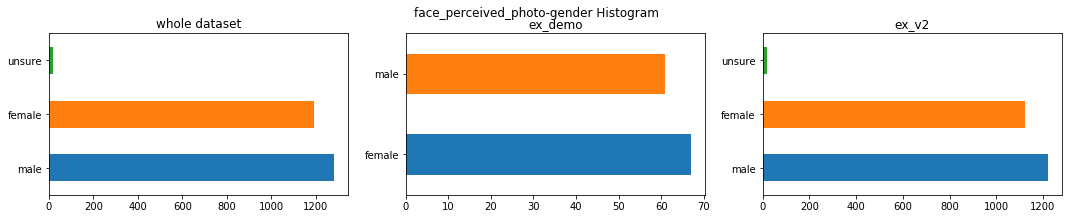

In [330]:
fr2_plot_distr('face_perceived_photo-gender', kind='barh', size=(15,3))

In [334]:
fr2[fr2['face_perceived_photo-gender'] == 'unsure'].faceID.value_counts()

IMG_7912    3
IMG_9228    2
IMG_0230    2
IMG_0063    2
IMG_8834    1
IMG_7502    1
IMG_9093    1
IMG_8138    1
IMG_9078    1
IMG_9409    1
IMG_0491    1
IMG_8682    1
Name: faceID, dtype: int64

### face_perceived_typical

In [337]:
fr2.face_perceived_typical.value_counts()

agree                1455
neutral               529
disagree              293
strongly-agree        188
strongly-disagree      26
Name: face_perceived_typical, dtype: int64

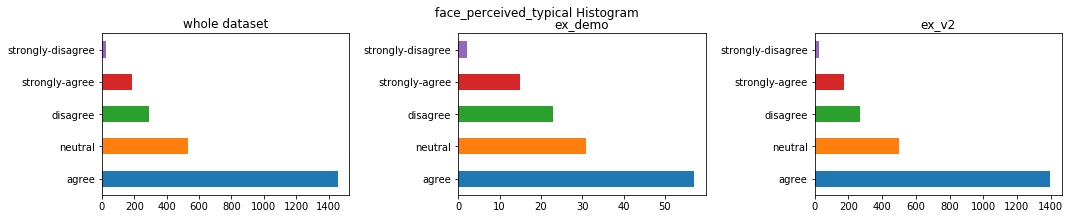

In [338]:
fr2_plot_distr('face_perceived_typical', kind='barh', size=(15,3))

In [348]:
#save cleaned data to new csv files
fr1.to_csv('csv/face_rating_1_expanded_cleaned.csv')
fr2.to_csv('csv/face_rating_2_expanded_cleaned.csv') 